In [20]:
from AS import AS_TSP
from ACS import ACS_TSP
from MMAS import MMAS_TSP
import scipy.spatial
import numpy as np
from matplotlib import pyplot as plt


In [21]:

with open('att48-33523.tsp') as f:
    n_dim = int(f.readline())
    distance = []
    for line in f:
        distance.append(list(line.split()[1:]))
distance = np.matrix(distance)
distance = distance.astype(float)
distance_matrix = scipy.spatial.distance.cdist(distance,distance,metric = 'euclidean')
distance_matrix

array([[   0.        , 4726.65314996, 1204.34920185, ..., 1541.72922396,
        2378.53442271, 3743.0792137 ],
       [4726.65314996,    0.        , 3587.42316991, ..., 5460.74765943,
        4389.05547926, 2087.27669464],
       [1204.34920185, 3587.42316991,    0.        , ..., 2022.99036083,
        1866.16746301, 2559.95566368],
       ...,
       [1541.72922396, 5460.74765943, 2022.99036083, ...,    0.        ,
        1643.50509582, 3927.24547234],
       [2378.53442271, 4389.05547926, 1866.16746301, ..., 1643.50509582,
           0.        , 2531.02745935],
       [3743.0792137 , 2087.27669464, 2559.95566368, ..., 3927.24547234,
        2531.02745935,    0.        ]])

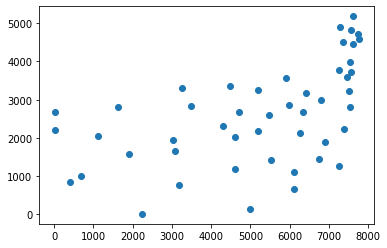

In [22]:
plt.scatter(list(distance[:,0].T),list(distance[:,1].T))

In [23]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [ ]:
mmas_tsp = MMAS_TSP(cal_total_distance,n_dim=n_dim,l_ini =36000,rho=0.9,size_pop=50,max_iter=300,distance_matrix=distance_matrix,alpha=1,beta=2,seed=22)
best_x,best_y = mmas_tsp.run()
best_y 

In [25]:
as_tsp = AS_TSP(cal_total_distance,n_dim,l_ini =36000,size_pop=50,max_iter=400,rho=0.1,distance_matrix=distance_matrix,q=1,seed=30,alpha=2,beta=3)
best_x,best_y = as_tsp.run()
best_y 

KeyboardInterrupt: 

In [ ]:
acs_tsp = ACS_TSP(cal_total_distance,n_dim=n_dim,l_ini =36000,rho=0.1,size_pop=50,max_iter=1000,distance_matrix=distance_matrix,seed=42)
best_x,best_y = acs_tsp.run()
best_y 

765.1901088764275